In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Reading Water Level At Galchi

In [145]:
wlg_Sept01_Dec26=pd.read_csv('Dataset/2024/water_level_galchi_Sept01_Dec26.csv')
wlg_Sept01_Dec26.head()
print(wlg_Sept01_Dec26.dtypes)

dateTime    object
value       object
dtype: object


Handling Null Values in Original Dataset Via Interpolation

In [146]:
def handle_null_values(df):
    #for the first null value with no preceeding value.
    df['value']=df['value'].fillna(method='bfill')
    #since water levels are continuous and expected to follow a natural trend we interpolate null values
    df['value']=df['value'].interpolate(method='linear') 

In [147]:
def handle_outliers(df):
    min_value=50
    max_value=10000000
    # Remove rows where the specific column's value is below the minimum or above the maximum threshold
    df = df[(df['value'] >= min_value) & (df['value'] <= max_value)].copy() 
    print(df.head())
    
    return df

Converting to relevant data types:

In [148]:
def preprocess_data(df):   
    df['dateTime']=pd.to_datetime(df['dateTime'])
    df['value']=pd.to_numeric(df['value'],errors='coerce')
    df.set_index('dateTime',inplace=True)
    df =handle_outliers(df)
    handle_null_values(df)
    return df


Preprocess Data

In [149]:
#Only the original df should be preprocessed,else there will be error
wlg_Sept01_Dec26=preprocess_data(wlg_Sept01_Dec26)

                          value
dateTime                       
2024-10-01 00:05:00  368.264893
2024-10-01 00:15:00  368.272583
2024-10-01 00:25:00  368.251984
2024-10-01 00:35:00  368.272095
2024-10-01 00:45:00  368.282379


C:\Users\aryan\AppData\Local\Temp\ipykernel_18296\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


Verifying Preprocess Data

In [150]:
wlc_Sept01_Dec26=pd.read_csv('Dataset/2024/water_level_chumlingtar_Sept01_Dec26.csv')
wlc_Sept01_Dec26.head()
print(wlc_Sept01_Dec26.dtypes)

dateTime    object
value       object
dtype: object


Preprocess Water Level at Chumlingtar

In [151]:
wlc_Sept01_Dec26=preprocess_data(wlc_Sept01_Dec26)
wlc_Sept26_Oct03.head()

                          value
dateTime                       
2024-09-24 11:25:00  257.194519
2024-09-24 11:35:00  257.196808
2024-09-24 11:45:00  257.196899
2024-09-24 11:55:00  257.207520
2024-09-24 12:05:00  257.208405


C:\Users\aryan\AppData\Local\Temp\ipykernel_18296\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


,value
dateTime,
2024-09-26 00:05:00,257.328705
2024-09-26 00:15:00,257.353210
2024-09-26 00:25:00,257.268219
2024-09-26 00:35:00,257.308899
2024-09-26 00:45:00,257.302917


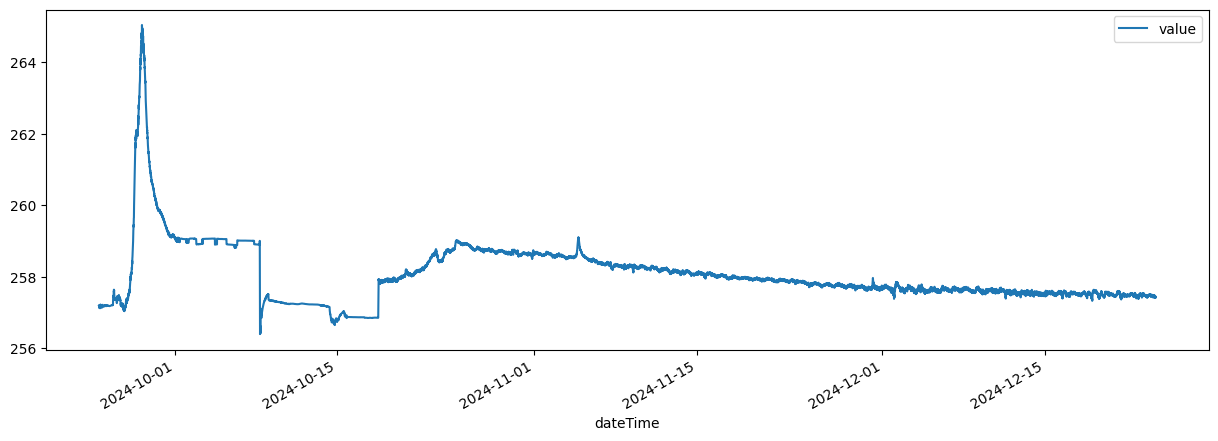

In [152]:
fig,ax=plt.subplots(figsize=(15,5))
wlc_Sept01_Dec26.plot(ax=ax)
plt.show()

In [83]:
def rolling_statistics(input_data):
    window_size=5 #7*144 interval/day
    rolling_mean=input_data.rolling(window=window_size).mean()
    rolling_std=input_data.rolling(window=window_size).std()
    
    fig,ax=plt.subplots(3,1,figsize=(15,5))
    orig=ax[0].plot(input_data,color='black',label='original')
    
    # Calculate the min and max values 
    min_value = input_data.min()
    max_value = input_data.max()

    # Adding a small margin to the min and max values to make sure the plot is not clipped
    margin = 0.05  # 5% margin
    min_margin = min_value - margin * (max_value - min_value)
    max_margin = max_value + margin * (max_value - min_value)

    # Set the y-axis limits dynamically
    ax[0].set_ylim(min_margin, max_margin)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
    
    ax[0].legend(loc='best')
    
    mean=ax[1].plot(rolling_mean,color='green',label='Rolling mean')
    std=ax[2].plot(rolling_std,color='blue',label='Rolling std')
    ax[1].legend(loc='best')
    ax[2].legend(loc='best')
    ax[1].set_title('Rolling Mean')
    ax[2].set_title('Std Dev')
    plt.show()
    

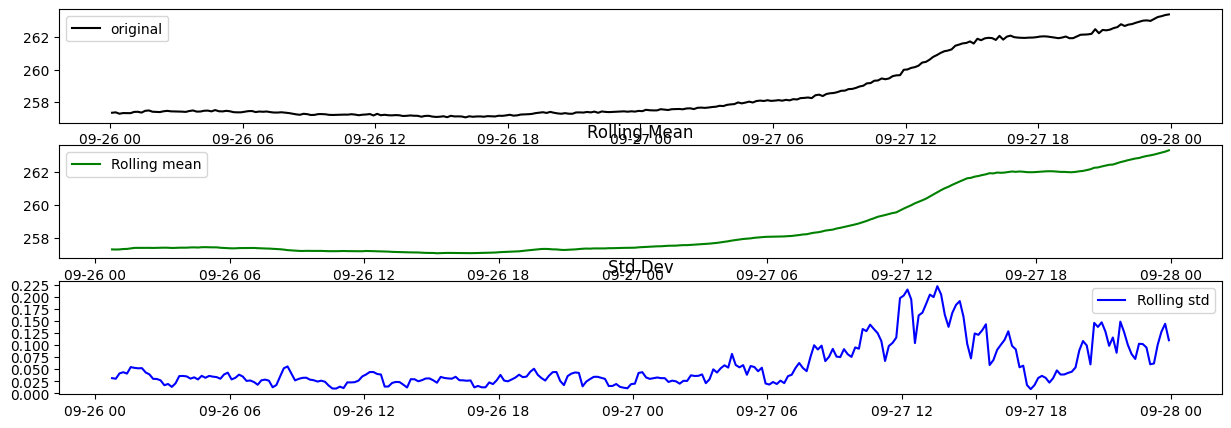

In [84]:
wlc_Sept26_Oct03=wlc_Sept01_Dec26['2024-09-26':'2024-09-27']
rolling_statistics(wlc_Sept26_Oct03['value'])